# Яндекс Афиша. Исследовательский анализ данных и проверка гипотез

- Автор: Маликов Виталий
- Дата: 31-07-2025


Коллеги из продуктового отдела сервиса Яндекс Афиша заметили общее изменение в пользовательском спросе. Причины этого пока неясны. Сработал фактор сезонности, и пользователи поменяли предпочтения? Или изменилась аудитория? Стоит также разобраться, какие события стали привлекать больше зрителей, а какие организаторы и площадки выбились в лидеры. А также понять, отличаются ли своей активностью пользователи мобильных устройств от клиентов, которые бронируют билеты со стационарного компьютера.

Коллеги из продуктовой команды просят провести исследовательский анализ данных в Python, чтобы выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.

## Описание данных

В распоряжении данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года. Подготовили два датасета final_tickets_orders_df.csv и final_tickets_events_df.csv.

Первый датасет final_tickets_orders_df.csv включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Поля датасета соответствуют таблице purchases, с которой вы работали в предыдущих заданиях:
- order_id — уникальный идентификатор заказа.
- user_id — уникальный идентификатор пользователя.
- created_dt_msk — дата создания заказа (московское время).
- created_ts_msk — дата и время создания заказа (московское время).
- event_id — идентификатор мероприятия из таблицы events.
- cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- age_limit — возрастное ограничение мероприятия.
- currency_code — валюта оплаты, например rub для российских рублей.
- device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
- revenue — выручка от заказа.
- service_name — название билетного оператора.
- tickets_count — количество купленных билетов.
- total — общая сумма заказа.

В данные также был добавлен столбец days_since_prev с количеством дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.

Второй датасет final_tickets_events_df содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Обратите внимание, что из данных исключили фильмы, ведь, как было видно на дашборде, событий такого типа не так много. Датасет содержит такие поля:
- event_id — уникальный идентификатор мероприятия.
- event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- event_type_description — описание типа мероприятия.
- event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.
- organizers — организаторы мероприятия.
- region_name — название региона.
- city_name — название города.
- venue_id — уникальный идентификатор площадки.
- venue_name — название площадки.
- venue_address — адрес площадки.

Выручка от заказов представлена в двух валютах — российских рублях и казахстанских тенге. Для удобства решения было бы корректно привести данные к одной валюте, например к российским рублям. Для этого в вашем распоряжении будет датасет final_tickets_tenge_df.csv с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:
- nominal — номинал (100 тенге).
- data — дата.
- curs — курс тенге к рублю.
- cdx — обозначение валюты (kzt).
Используйте эти данные для конвертации валюты.

## Что нужно сделать

- Шаг 0. Оформление тетрадки Jupyter Notebook
- Шаг 1. Загрузка данных и знакомство с ними
- Шаг 2. Предобработка данных и подготовка их к исследованию
- Шаг 3. Исследовательский анализ данных
 - 3.1. Анализ распределения заказов по сегментам и их сезонные изменения
 - 3.2. Осенняя активность пользователей
 - 3.3. Популярные события и партнёры
- Шаг 4. Статистический анализ данных
- Шаг 5. Общий вывод и рекомендации

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
 
Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта: отлично, что сформулирована цель проекта, описаны шаги выполнения проекта и входные данные.

### 1. Работа с историческими данными (EDA)

#### Загрузка данных и знакомство с ними

Загрузите данные и получите первую информацию о них. Оцените объём данных, их корректность и соответствие описанию, а также предположите, какие шаги необходимо сделать на стадии предобработки данных. Основные моменты зафиксируйте в промежуточном выводе.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.proportion import proportions_ztest

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Хорошо, необходимые модули загружены

In [2]:
df_orders = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
df_orders.info() #.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [3]:
df_orders.isna().sum()

order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64

In [4]:
df_events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [5]:
df_tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')
df_tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Промежуточный вывод:
- В датафрейме df_orders 290849 строк и 14 столбцов. Типы столбцов соответствуют своему назначению, кроме столбцов даты created_dt_msk и created_ts_msk (тип object). В дальнейшем стоит поменять их тип на datetime. Столбец days_since_prev содержит 21940 пропусков. 
- В датафрейме df_events 22427 строк и 11 столбцов
- В датафрейме df_tenge 357 строк и 4 столбца

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

По итогу первичного знакомства с данными верно отмечено, что за данные, какого они качества, есть ли пропуски/типы данных, которые нужно скорректировать.

#### Предобработка данных и подготовка их к исследованию
Проведите предобработку данных:
- Проверьте данные на пропуски. Проверьте, что выгрузка данных из SQL была успешной. Кроме столбца days_since_prev, данные не должны содержать пропусков.
- Изучите значения в ключевых столбцах и при обнаружении ошибок обработайте их.
- Для категориальных значений изучите, какие категории присутствуют в данных. Проверьте, встречаются ли значения, которые могут обозначать пропуски в данных или отсутствие информации. Проведите нормализацию данных, если это необходимо.
- Для количественных значений посмотрите на распределение и наличие выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха. Для анализа данных важными показателями являются выручка с заказа revenue и количество билетов в заказе tickets_count, поэтому в первую очередь проверьте данные в этих столбцах. Если найдутся выбросы в выручке с заказа revenue, то отберите значения по 99-му процентилю. Не забудьте, что данные изначально были представлены в разных валютах, поэтому разделите анализ на рубли и тенге.
- Проверьте явные и неявные дубликаты. Сделайте акцент на неявных дубликатах по бронированию билета без учёта идентификаторов заказа и, если такие будут, примите обоснованное решение, как их стоит обработать.
- Проведите преобразования типов данных. Обратите внимание на типы данных с датой и временем, а также проверьте возможность снижения размерности количественных данных.
- Создайте несколько новых столбцов:
 - revenue_rub — приведите выручку с заказа к единой валюте — российскому рублю. Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю final_tickets_tenge_df.csv за 2024 год. Значения в рублях представлены для 100 тенге.
 - one_ticket_revenue_rub — рассчитайте выручку с продажи одного билета на мероприятие.
 - month — выделите месяц оформления заказа в отдельный столбец.
 - season — создайте столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.

Рекомендация: вначале можно объединить данные в один датафрейм, а затем провести общую предобработку.

После предобработки проверьте, сколько данных вы отобрали, если выполняли фильтрацию, а также дайте промежуточный вывод с основными действиями и описанием новых столбцов.

In [6]:
# Объединим все датафреймы в один

df = pd.merge(df_orders, df_events, on='event_id', how='left')
df = pd.merge(df, df_tenge, left_on='created_dt_msk', right_on='data', how='left')

# Устанавливаем максимальное количество отображаемых столбцов
pd.set_option('display.max_columns', None) 

#df.head(5)

In [7]:
# Приведем поля с датой к типу data

df['created_dt_msk'] = pd.to_datetime(df['created_dt_msk'])
df['created_ts_msk'] = pd.to_datetime(df['created_ts_msk'])

print(df[['created_dt_msk', 'created_ts_msk']].dtypes)

created_dt_msk    datetime64[ns]
created_ts_msk    datetime64[ns]
dtype: object


In [8]:
# Приведем к единой валюте. Для этого создадим столбец revenue_rub
df['revenue_rub'] = df.apply(lambda row: row['total'] * row['curs'] / 100 if row['currency_code'] == 'kzt' else row['total'], axis=1)

# Расчитаем выручку с продажи одного билета на мероприятие и создадим столбец one_ticket_revenue_rub
df['one_ticket_revenue_rub'] = df['revenue_rub'] / df['tickets_count']

# Выделим месяц в отдельное поле 
df['month'] = df['created_ts_msk'].dt.month

# Добавим столбец season
df['season'] = 'другое'
df.loc[(df['month'] <= 2) | (df['month'] == 12), 'season'] = 'зима'
df.loc[(df['month'] >= 3) & (df['month'] <= 5), 'season'] = 'весна'
df.loc[(df['month'] >= 6) & (df['month'] <= 8), 'season'] = 'лето'
df.loc[(df['month'] >= 9) & (df['month'] <= 11), 'season'] = 'осень'

#df.head(5)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отлично, данные приведены к единой валюте

In [9]:
# Проверим на пропуски

df.isna().sum()

order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21940
event_name                  238
event_type_description      238
event_type_main             238
organizers                  238
region_name                 238
city_name                   238
city_id                     238
venue_id                    238
venue_name                  238
venue_address               238
data                          0
nominal                       0
curs                          0
cdx                           0
revenue_rub                   0
one_ticket_revenue_rub        0
month                         0
season  

In [10]:
# Удалим строки с пропусками в следующих столбцах:

df_cleaned = df.dropna(subset=['event_name', 'event_type_description', 'event_type_main', 'organizers', 
                               'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name', 'venue_address'])

На данном этапе было удалено из датафрейма 238 строк

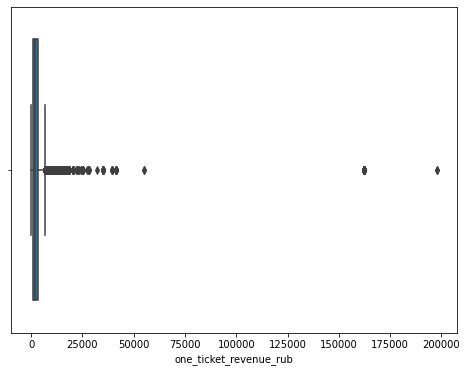

In [11]:
# Для количественных значений посмотрим на распределение и наличие выбросов

plt.figure(figsize=(8, 6))
#sns.boxplot(data=df_cleaned, x='tickets_count')
#sns.boxplot(data=df_cleaned, x='revenue_rub')
sns.boxplot(data=df_cleaned, x='one_ticket_revenue_rub')

#plt.title('Распределение revenue')
plt.show()

In [12]:
# Фильтруем выбросы по 99 процентилю

percentile_99_ticket = df['tickets_count'].quantile(0.99)
percentile_99_revenue = df['revenue_rub'].quantile(0.99)
percentile_99_tick_rev = df['one_ticket_revenue_rub'].quantile(0.99)

df_filtered = df[df['tickets_count'] <= percentile_99_ticket]
df_filtered = df[df['revenue_rub'] <= percentile_99_revenue]
df_filtered = df[df['one_ticket_revenue_rub'] <= percentile_99_tick_rev]

In [13]:
# Проверим на явные дубликаты

print(f'Всего явных дубликатов: {df_filtered.duplicated().sum()}')

Всего явных дубликатов: 0


In [14]:
# Проверим на неявные дубликаты по бронированию билета без учёта идентификаторов заказа

print(f"Количество неявных дубликатов: {df_filtered.duplicated(subset=['user_id', 'created_ts_msk', 'event_id', 'venue_id', 'tickets_count', 'revenue', 'service_name']).sum()}")

Количество неявных дубликатов: 44


In [15]:
# Удалим неявные дубликаты

df_clean = df_filtered.drop_duplicates(
    subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 'venue_id', 'tickets_count'],
    keep='first'
)

# Проверяем результат

print(f"Было: {len(df_filtered)} строк, стало: {len(df_clean)} строк")
print(f'\nВсего удалено: {round(100 - 100 * (len(df_clean) / len(df)), 2)}% данных')

Было: 287945 строк, стало: 287901 строк

Всего удалено: 1.01% данных


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Тут хорошо, неявные дубликаты обработаны

Промежуточный вывод:
- Создан столбец со стоимостью в единой валюте (в рублях) revenue_rub
- Создан столбец выручки с продажи одного билета на мероприятие one_ticket_revenue_rub 
- Выделили месяц в отдельное поле month
- Создан столбец с сезоном season
- Отфильтровали tickets_count, revenue_rub и one_ticket_revenue_rub по 99 процентилю
- Проверили на явные и неявные дубликаты. Таким образом от начального объема данных осталось 287901 (удалено 1,01% данных)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верное решение по результатам обработки сделать вывод об основных изменениях

#### Исследовательский анализ данных
 
 3.1. Анализ распределения заказов по сегментам и их сезонные изменения

Анализ дашборда показал, что в данных наблюдается сезонность — осенью количество заказов увеличивается. На стадии исследовательского анализа изучите изменение пользовательской активности или пользовательского интереса в связи с сезонностью. Анализируйте динамику по таким разрезам:
- тип мероприятия event_type_main;
- тип устройства device_type_canonical;
- категория мероприятий по возрастному рейтингу age_limit.

В этом разделе изучите распределение заказов по сегментам и их сезонные изменения, выполнив следующие шаги:

- Для каждого месяца найдите количество заказов и визуализируйте результаты. Проверьте, фиксируется ли увеличение заказов от июня к ноябрю 2024 года.
- Для осеннего и летнего периодов сравните распределение заказов билетов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу. Результаты визуализируйте подходящим графиком, который поможет сопоставить значения для летнего и осеннего сезонов. Рекомендация: поскольку абсолютное количество заказов в разные сезоны может меняться, при сопоставлении результатов для каждого сегмента используйте доли.
- Изучите изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью. Видна ли динамика средней стоимости билета в разрезе разных категорий мероприятий? Для каждого типа мероприятия рассчитайте среднее значение выручки с одного билета, затем найдите относительное изменение осенних значений по сравнению с летними. Результат сопроводите подходящей визуализацией.
- Сделайте вывод о том, как меняется распределение заказов в каждой категории с наступлением осени. Было ли изменение средней стоимости одного билета в разрезе разных типов мероприятий?

In [16]:
df_clean.head(5)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt,10870.99,2717.747500,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt,2067.51,1033.755000,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt,13984.16,3496.040000,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt,212.28,106.140000,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt,10695.43,3565.143333,10,осень


In [17]:
# Группируем по месяцам

df_grouped_month = df_clean.groupby('month')['order_id'].count().reset_index()
df_grouped_month

,month,order_id
0,6,33228
1,7,40696
2,8,44764
3,9,69546
4,10,99667


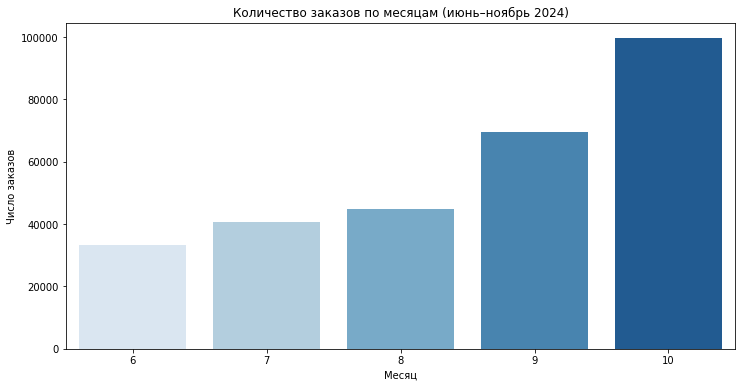

In [18]:
plt.figure(figsize=(12, 6))

# Столбчатая диаграмма
sns.barplot(data=df_grouped_month, x='month', y='order_id', palette='Blues')
plt.title('Количество заказов по месяцам (июнь–ноябрь 2024)')
plt.xlabel('Месяц')
plt.ylabel('Число заказов')

plt.show()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Правильно, что не отображаешь месяцы без заказов

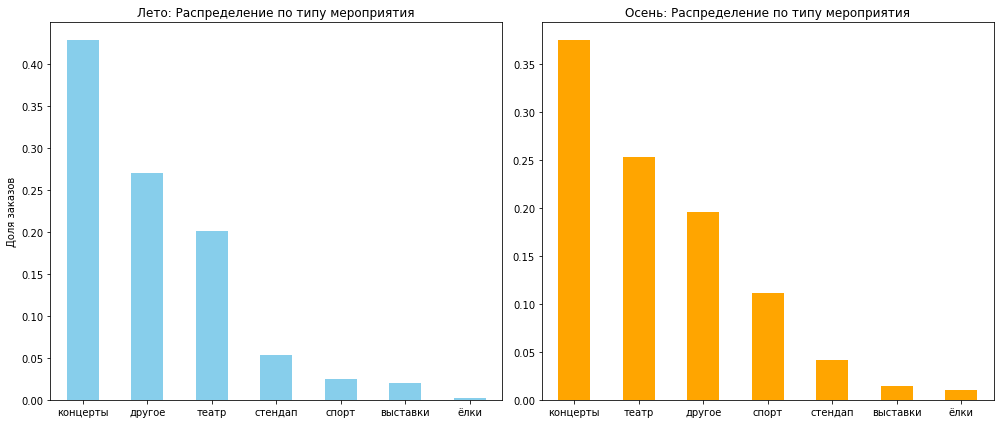

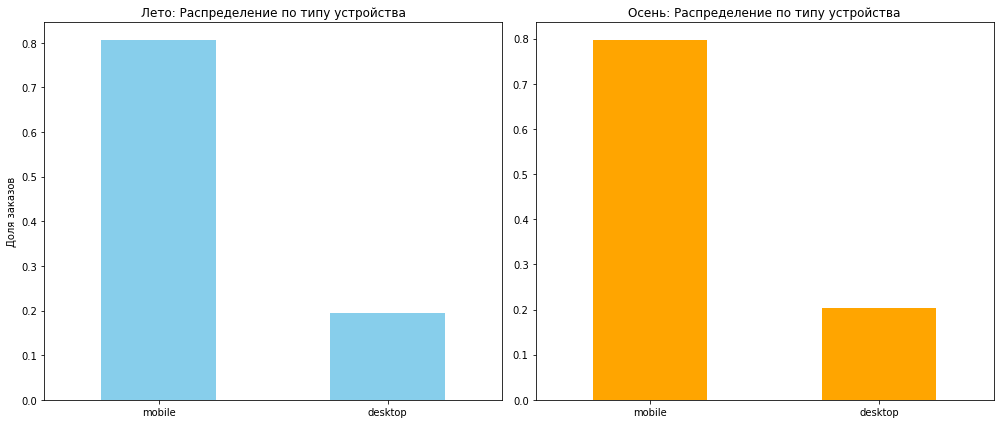

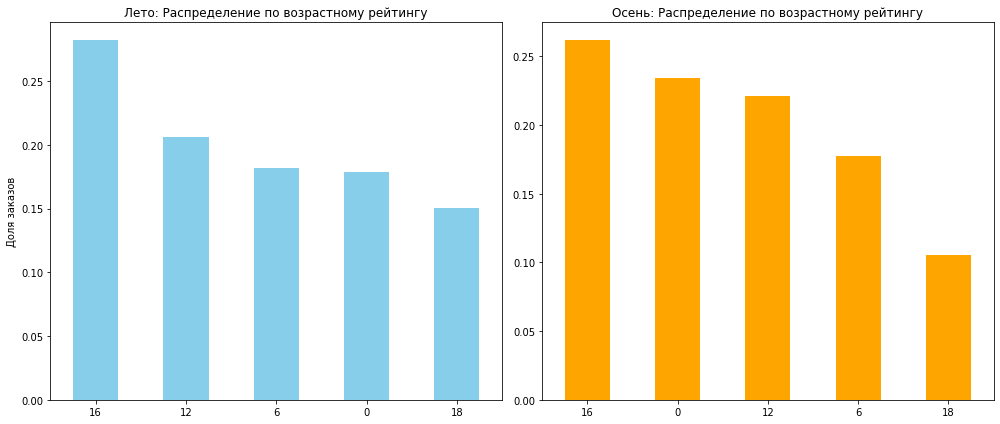

In [19]:
# Создаем отдельные датафреймы для лета и осени

summer_df = df[df['season'] == 'лето']
autumn_df = df[df['season'] == 'осень']


# Сделаем функцию для построения сравнения распределений

def compare_distributions(column, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Летнее распределение
    summer_counts = summer_df[column].value_counts(normalize=True)
    summer_counts.plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title(f'Лето: {title}')
    axes[0].set_ylabel('Доля заказов')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Осеннее распределение
    autumn_counts = autumn_df[column].value_counts(normalize=True)
    autumn_counts.plot(kind='bar', ax=axes[1], color='orange')
    axes[1].set_title(f'Осень: {title}')
    axes[1].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
#    plt.xlabel(column)
    plt.show()

# Сравниваем по типу мероприятия
compare_distributions('event_type_main', 'Распределение по типу мероприятия')

# Сравниваем по типу устройства
compare_distributions('device_type_canonical', 'Распределение по типу устройства')

# Сравниваем по возрастному рейтингу
compare_distributions('age_limit', 'Распределение по возрастному рейтингу')

In [20]:
# Сгруппируем данные по сезону и типу мероприятия
season_event_revenue = df.groupby(['season', 'event_type_main'])['one_ticket_revenue_rub'].mean().reset_index()
season_event_revenue

,season,event_type_main,one_ticket_revenue_rub
0,лето,выставки,851.331827
1,лето,другое,1386.904713
2,лето,концерты,3510.615160
3,лето,спорт,796.696547
4,лето,стендап,1963.741939
5,лето,театр,2533.895429
6,лето,ёлки,2744.353840
7,осень,выставки,848.090491
8,осень,другое,1399.370364
9,осень,концерты,3063.714932


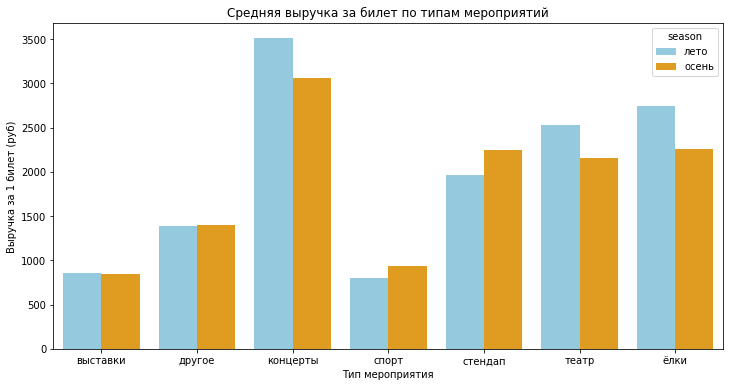

In [21]:
# Посмотрим среднюю выручку за билет по типам мероприятий

plt.figure(figsize=(12, 6))

sns.barplot(data=season_event_revenue, x='event_type_main', y='one_ticket_revenue_rub', hue='season', 
            palette={'лето': 'skyblue', 'осень': 'orange'})

plt.title('Средняя выручка за билет по типам мероприятий')
plt.xlabel('Тип мероприятия')
plt.ylabel('Выручка за 1 билет (руб)')

plt.show()

In [22]:
# Разделим данные на лето и осень для удобства
summer_revenue = season_event_revenue[season_event_revenue['season'] == 'лето']
autumn_revenue = season_event_revenue[season_event_revenue['season'] == 'осень']

# Теперь объединим для сравнения
comparison = summer_revenue.merge(autumn_revenue, on='event_type_main', suffixes=('_лето', '_осень'))
comparison['изменение_выручки'] = comparison['one_ticket_revenue_rub_осень'] - comparison['one_ticket_revenue_rub_лето']
comparison['изменение_%'] = (comparison['изменение_выручки'] / comparison['one_ticket_revenue_rub_лето']) * 100

comparison[['event_type_main', 'one_ticket_revenue_rub_лето', 'one_ticket_revenue_rub_осень', 'изменение_выручки', 'изменение_%']]

,event_type_main,one_ticket_revenue_rub_лето,one_ticket_revenue_rub_осень,изменение_выручки,изменение_%
0,выставки,851.331827,848.090491,-3.241336,-0.380737
1,другое,1386.904713,1399.370364,12.465651,0.898811
2,концерты,3510.615160,3063.714932,-446.900228,-12.729969
3,спорт,796.696547,937.193174,140.496628,17.634899
4,стендап,1963.741939,2251.756033,288.014094,14.666596
5,театр,2533.895429,2158.926256,-374.969173,-14.798131
6,ёлки,2744.353840,2258.546844,-485.806996,-17.702054


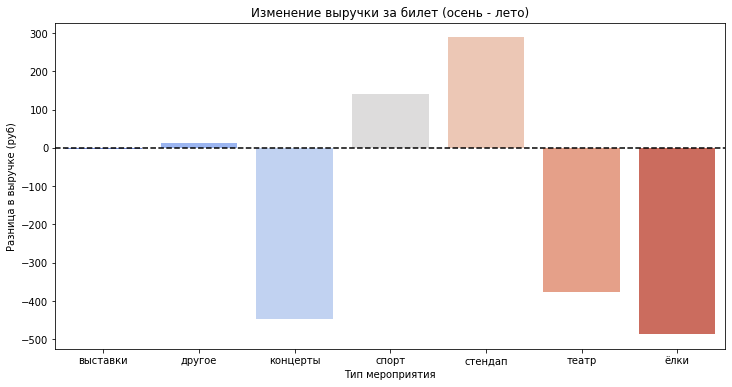

In [23]:
# График изменения выручки

plt.figure(figsize=(12, 6))

sns.barplot(data=comparison, x='event_type_main', y='изменение_выручки', palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Изменение выручки за билет (осень - лето)')
plt.xlabel('Тип мероприятия')
plt.ylabel('Разница в выручке (руб)')
#plt.xticks(rotation=45)

plt.show()

Промежуточный вывод:
- График заказов от 6 к 10 месяцу показал уверенный рост (от примерно 3,5 до 10 тыс. заказов)
- Летом и осенью самой популярной категорией были концерты (45% и 35% соответственно). А выставки и елки - самыми непопулярными (менее 5% заказов). 
- Традиционно в каждый сезон доля заказов со смартфонов составляет порядка 80%
- И летом и осень самым популярным возрастным рейтингом стал 16+, а самым непопулярным - 18+
- Наиболее дорогостоящими стали билеты на концерты со средней стоимостью 3,5 и 3 тыс. руб. летом и осенью соответственно. А самые доступные билеты на спортивные мероприятия и выставки. В то же время осенью стоимость билетов на стендапы и спортивные мероприятия возрасла на примерно 280 и 150 руб. соответственно. На елки, концерты и театры снизилась на примерно 470, 450 и 360 руб. соответственно.   

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Да, можно также заметить, что с июня по октябрь отмечается устойчивый рост количества заказов по различным сегментам. 

 3.2. Осенняя активность пользователей
 
Изучите активность пользователей осенью 2024 года. В вашем распоряжении данные за два осенних месяца. Используйте только эти данные и сделайте следующее:
- Проанализируйте динамику изменений по дням для:
 - общего числа заказов;
 - количества активных пользователей DAU;
 - среднего числа заказов на одного пользователя;
 - средней стоимости одного билета.
 
Рекомендация: удобно создать одну сводную таблицу, и в ней по дням рассчитать число заказов и число уникальных пользователей, а затем найти величину — количество заказов на одного пользователя. Полученные результаты можно визуализировать с помощью линейного графика. Подобные графики вы строили на дашборде, только делали это с агрегацией по неделям.

- Изучите недельную цикличность. Выделите день недели и сравните пользовательскую активность в будни и выходные.
- Напишите промежуточный вывод о пользовательской активности и недельной цикличности.

In [24]:
# Выделим только осенний период
df_autumn = df_cleaned[df_cleaned['season'] == 'осень']

# Создаем сводную таблицу по дням
daily_metrics = df_autumn.groupby('created_dt_msk').agg(
    total_orders=('order_id', 'count'),  # Общее число заказов
    dau=('user_id', 'nunique'),          # DAU (уникальные пользователи)
    total_revenue=('revenue_rub', 'sum') # Суммарная выручка
).reset_index()

daily_metrics['avg_orders_per_user'] = daily_metrics['total_orders'] / daily_metrics['dau']
daily_metrics['avg_ticket_price'] = daily_metrics['total_revenue'] / daily_metrics['total_orders']

daily_metrics.head(5)

,created_dt_msk,total_orders,dau,total_revenue,avg_orders_per_user,avg_ticket_price
0,2024-09-01,1348,569,8.947456e+06,2.369069,6637.578329
1,2024-09-02,1391,580,8.533378e+06,2.398276,6134.707098
2,2024-09-03,5124,783,1.964223e+07,6.544061,3833.378277
3,2024-09-04,1784,688,1.082011e+07,2.593023,6065.082602
4,2024-09-05,1960,745,1.200932e+07,2.630872,6127.203068


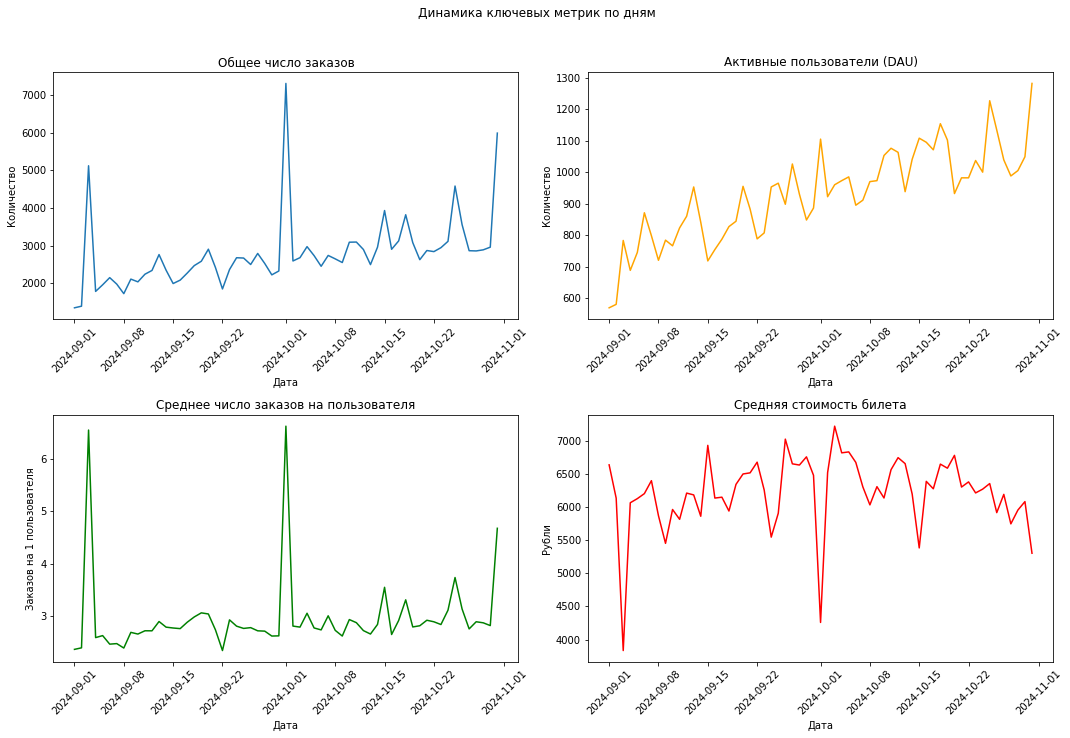

In [25]:
# Строим графики для метрик

plt.figure(figsize=(15, 10))
plt.suptitle('Динамика ключевых метрик по дням', y=1.02)


# Общее число заказов
plt.subplot(2, 2, 1)
sns.lineplot(data=daily_metrics, x='created_dt_msk', y='total_orders')
plt.title('Общее число заказов')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.xticks(rotation=45)

# DAU (активные пользователи)
plt.subplot(2, 2, 2)
sns.lineplot(data=daily_metrics, x='created_dt_msk', y='dau', color='orange')
plt.title('Активные пользователи (DAU)')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.xticks(rotation=45)

# Среднее число заказов на пользователя
plt.subplot(2, 2, 3)
sns.lineplot(data=daily_metrics, x='created_dt_msk', y='avg_orders_per_user', color='green')
plt.title('Среднее число заказов на пользователя')
plt.xlabel('Дата')
plt.ylabel('Заказов на 1 пользователя')
plt.xticks(rotation=45)

# Средняя стоимость билета
plt.subplot(2, 2, 4)
sns.lineplot(data=daily_metrics, x='created_dt_msk', y='avg_ticket_price', color='red')
plt.title('Средняя стоимость билета')
plt.xlabel('Дата')
plt.ylabel('Рубли')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [26]:
# Добавим день недели и тип дня (будни/выходные)
daily_metrics['day_of_week'] = daily_metrics['created_dt_msk'].dt.day_name()
daily_metrics['day_type'] = daily_metrics['day_of_week'].apply(
    lambda x: 'Выходной' if x in ['Saturday', 'Sunday'] else 'Будни'
)

# Сгруппируем данные по типу дня
weekday_analysis = daily_metrics.groupby('day_type').agg({
    'total_orders': 'mean',
    'dau': 'mean',
    'avg_orders_per_user': 'mean',
    'avg_ticket_price': 'mean'
}).reset_index()

weekday_analysis

,day_type,total_orders,dau,avg_orders_per_user,avg_ticket_price
0,Будни,2932.977273,943.613636,3.073281,6104.335614
1,Выходной,2419.058824,893.117647,2.685348,6510.058601


Промежуточный вывод:
- Общее число заказов принимало максимальные значения 1 сентября, 1 октября и 31 октября (5, 7 и 6 тыс. соответственно)
- Среднее число заказов на пользователя принимало максимальные значения 1 сентября, 1 октября и 31 октября (6,5, 6,5 и 5 соответственно)
- При этом минимальные значение средней стоимости билета также выпадали на указанные периоды
- Кол-во активных пользователей, в целом, имело равномерный рост на протяжении всего перида
- В будние дни пользовательская активность выше, чем в выходные (943 и 893 соответственно). Среднее кол-во заказов в будни также выше (3 и 2 соответственно). При этом средняя стоимость билета в бидни тоже ниже (6100 и 6500 руб. соответственно)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Осенью 2024 года наблюдается положительная динамика: общее число заказов и количество активных пользователей постепенно увеличиваются. Среднее число заказов на одного пользователя остаётся стабильным, с пиками в отдельные дни. Средняя стоимость билета колеблется, но не демонстрирует чёткой тенденции.

 3.3. Популярные события и партнёры
 
После того как изучите изменение популярности событий и пользовательской активности осенью 2024 года, посмотрите, как события распределены по регионам и партнёрам. Это позволит выделить ключевые регионы и партнёров, которые вносят наибольший вклад в выручку.

- Для каждого региона посчитайте уникальное количество мероприятий и общее число заказов. В каких регионах предлагается наибольшее разнообразие мероприятий?
- Для каждого билетного партнёра посчитайте общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов. Сделайте акцент на наиболее активных партнёрах.

Рекомендация: исследуйте не только абсолютные значения, но и доли. Например, для каждого региона посчитайте долю проводимых мероприятий от их общего числа или долю заказов в регионе от общего числа заказов.
В конце напишите промежуточный вывод, проанализируйте не только топ-категории, но и общее распределение данных между категориями. Существуют ли явные лидеры среди регионов и партнёров?

In [27]:
# Для каждого региона посчитаем уникальное количество мероприятий, общее число заказов и
# в каких регионах предлагается наибольшее разнообразие мероприятий

df_grouped_region = df_autumn.groupby('region_name').agg(
    total_events=('event_id', 'nunique'),  # Уникальное число мероприятий
    total_orders=('order_id', 'count'),      # Общее число заказов
    diff_event_type=('event_type_description', 'nunique') # Разнообразие мероприятий
).reset_index().sort_values('total_events', ascending=False)


# Считаем доли

df_grouped_region['ration_total_events'] = round(df_grouped_region['total_events'] / df_grouped_region['total_events'].sum() * 100, 1)
df_grouped_region['ration_total_orders'] = round(df_grouped_region['total_orders'] / df_grouped_region['total_orders'].sum() * 100, 1)

df_grouped_region.head(20)

,region_name,total_events,total_orders,diff_event_type,ration_total_events,ration_total_orders
23,Каменевский регион,3946,47517,16,24.8,27.9
59,Североярская область,2622,20899,13,16.5,12.3
75,Широковская область,803,8739,15,5.0,5.1
56,Светополянский округ,764,4840,13,4.8,2.8
51,Речиновская область,529,3576,12,3.3,2.1
60,Серебринская область,456,4477,12,2.9,2.6
76,Яблоневская область,432,4225,12,2.7,2.5
67,Тепляковская область,420,2488,12,2.6,1.5
11,Горицветская область,406,3235,12,2.5,1.9
63,Солнечноземская область,403,4232,12,2.5,2.5


Промежуточный вывод:
- Наиболее насыщенным по кол-ву и типам мероприятий регионом является Каменевский (3946 (25%) мероприятий, 16 типов). На него пришлось порядка 28% всех заказов.
- На 2-м месте Североярская область	(2622 (12%) мероприятий, 13 типов). На нее пришлось порядка 12% всех заказов.

In [28]:
# Для каждого билетного партнёра посчитайте общее число уникальных мероприятий, 
# обработанных заказов и суммарную выручку с заказов билетов. Сделаем акцент на наиболее активных партнёрах

df_grouped_service = df_autumn.groupby('service_name').agg(
    total_events=('event_id', 'nunique'),  # Уникальное число мероприятий
    total_orders=('order_id', 'count'),      # Общее число заказов
    total_revenue=('revenue_rub', 'sum') # Суммарная выручка с заказов билетов
).reset_index().sort_values('total_events', ascending=False)


# Считаем доли

df_grouped_service['ratio_total_events'] = round(df_grouped_service['total_events'] / df_grouped_service['total_events'].sum() * 100, 1)
df_grouped_service['ratio_total_orders'] = round(df_grouped_service['total_orders'] / df_grouped_service['total_orders'].sum() * 100, 1)


df_grouped_service

,service_name,total_events,total_orders,total_revenue,ratio_total_events,ratio_total_orders
21,Лови билет!,3626,25874,1.250946e+08,20.9,15.2
3,Билеты без проблем,2855,32792,1.769048e+08,16.5,19.3
5,Билеты в руки,2472,25761,1.082571e+08,14.2,15.1
25,Облачко,1413,15616,1.210902e+08,8.1,9.2
22,Лучшие билеты,1396,12455,3.769896e+07,8.0,7.3
24,Мой билет,1012,19681,1.334060e+08,5.8,11.6
30,Тебе билет!,859,3779,2.420810e+07,5.0,2.2
26,Прачечная,728,5831,3.742339e+07,4.2,3.4
8,Весь в билетах,608,9642,9.871676e+07,3.5,5.7
34,Яблоко,538,3496,2.922180e+07,3.1,2.1


Промежуточный вывод:
- Наиболее активными билетными партнёрами стали "Лови билет!", "Билеты без проблем" и "Билеты в руки" с кол-вом мероприятий раным 3626, 2855 и 2472 соответственно. 
- При этом больше всего заказов оформил "Билеты без проблем" 32792 шт. (19%) с общей выручкой 177 млн руб. Следом идут "Лови билет!" 25874 шт. (15%) с общей выручкой 125 млн руб. и "Билеты в руки" 25761 шт. (15%) с общей выручкой 108 млн руб.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

    
«Билеты без проблем» — лидер по охвату, но проигрывает по доле мероприятий

#### Статистический анализ данных

Коллеги из продуктового отдела хотят отдельно проверить несколько гипотез относительно активности пользователей мобильных и стационарных устройств. Проверьте две гипотезы, которые предполагают большую активность пользователей мобильных устройств:
- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Перед проведением гипотез изучите сравниваемые данные, обоснуйте выбор статистического теста, укажите формулировку нулевой и альтернативной гипотез. Результаты тестов прокомментируйте в промежуточном выводе. Используйте данные только за осенний период.

Сформулируем первую гипотезу:

    Н0 (нулевая) - Среднее количество заказов на одного пользователя мобильного приложения такое же, как и у пользователей стационарных устройств
    Н1 (альтернативная) - Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств
 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

    
Верная интерпретация нулевой и альтернативной гипотезы

In [29]:
# Разделим пользователей на тех, кто пользуется телефоном и компьютером и
# провери равномерность распределения пользователей по группам

mobile_users = df_autumn[df_autumn['device_type_canonical'] == 'mobile']
desktop_users = df_autumn[df_autumn['device_type_canonical'] == 'desktop']  


a = mobile_users['order_id'].nunique()
b = desktop_users['order_id'].nunique()

print(f'Число уникальных пользователей мобильными устройствами: {a}')
print(f'Число уникальных пользователей компьютерами: {b}')

Число уникальных пользователей мобильными устройствами: 135488
Число уникальных пользователей компьютерами: 34687


In [30]:
#Проверим на отсутствие пересечений между группами

intersec_mobile_users =  set(mobile_users)
intersec_desktop_users = set(desktop_users)

intersection = intersec_mobile_users & intersec_desktop_users

print(f'Кол-во пересечений: {len(intersection)}')
print(intersection)

Кол-во пересечений: 32
{'age_limit', 'event_id', 'data', 'venue_name', 'city_name', 'venue_address', 'organizers', 'cdx', 'revenue_rub', 'city_id', 'month', 'event_type_description', 'event_name', 'created_dt_msk', 'one_ticket_revenue_rub', 'user_id', 'currency_code', 'cinema_circuit', 'revenue', 'device_type_canonical', 'tickets_count', 'curs', 'total', 'created_ts_msk', 'event_type_main', 'nominal', 'order_id', 'venue_id', 'days_since_prev', 'service_name', 'region_name', 'season'}


Кроме названий столбцов другие пересечения между группами отсутствуют. Выборки независыми, можем провести тесты

Используем t-тест для независимых выборок, так как:

- Данные непрерывные (количество заказов)

- Выборки независимы (разные пользователи)

In [31]:
# Оценим достаточность выборки для получения статистически значимых результатов A/B-теста 

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 1 - beta  # Мощность теста
p = 0.3 # Базовый уровень доли
mde = 0.03 #* p  # Минимальный детектируемый эффект
effect_size = proportion_effectsize(p, p + mde)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 3761


- При MDE = 3% (процентных пункта) размер выборки для каждой группы составляет 3761 пользователей или 7522 всего.
- С учетом того, что у нас более 170 тыс. пользователей, то выборка достаточна.

In [32]:
# Среднее число заказов на пользователя
mobile_orders_per_user = mobile_users.groupby('user_id')['order_id'].count()
desktop_orders_per_user = desktop_users.groupby('user_id')['order_id'].count()

#mobile_orders_per_user = mobile_orders_per_user[mobile_orders_per_user['order_id']<= mobile_orders_per_user.quantile(0.95)]
#desktop_orders_per_user

print(f'Среднее число заказов на пользователя с телефоном: {mobile_orders_per_user.mean():.2f}')
print(f'Среднее число заказов на пользователя с компьютером: {desktop_orders_per_user.mean():.2f}')

Среднее число заказов на пользователя с телефоном: 9.52
Среднее число заказов на пользователя с компьютером: 7.07


In [33]:
# Реализуем статиститеский Т-тест

alpha = 0.05

t_stat, p_value = stats.ttest_ind(mobile_orders_per_user, desktop_orders_per_user, alternative='greater')
print(f't-статистика = {t_stat:.2f}')

if p_value > alpha:
    print(f'p-value = {p_value:.4f}, значит нет оснований отвергать нулевую гипотезу')
else:
    print(f'p-value = {p_value:.4f}, значит пользователи мобильных устройств совершают больше заказов')

t-статистика = 2.39
p-value = 0.0085, значит пользователи мобильных устройств совершают больше заказов


Сформулируем вторую гипотезу:

    Н0 (нулевая) - Среднее время между заказами пользователей мобильных приложений такое же, как и у пользователей стационарных устройств
    Н1 (альтернативная) - Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств

In [34]:
# Уберем из датафрейма строки, где Nan в поле days_since_prev

mobile_users_no_na = mobile_users.dropna(subset=['days_since_prev'])
print('Пользователи мобильными устройствами')
print(f'Было: {mobile_users.shape[0]} Стало: {mobile_users_no_na.shape[0]}')
      
desktop_users_no_na = desktop_users.dropna(subset=['days_since_prev'])
print('\nПользователи стационарными устройствами')
print(f'Было: {desktop_users.shape[0]} Стало: {desktop_users_no_na.shape[0]}')    

Пользователи мобильными устройствами
Было: 135488 Стало: 128454

Пользователи стационарными устройствами
Было: 34687 Стало: 33308


In [35]:
# Найдем среднее время между заказами пользователей мобильных и стационарных устройств

mobile_time = mobile_users_no_na.groupby('user_id')['days_since_prev'].mean()
desktop_time = desktop_users_no_na.groupby('user_id')['days_since_prev'].mean()

print(f'Среднее время между заказами пользователей мобильных устройств: {mobile_time.mean():.2f} дней')
print(f'Среднее время между заказами пользователей стационарных устройств: {desktop_time.mean():.2f} дней')

Среднее время между заказами пользователей мобильных устройств: 20.65 дней
Среднее время между заказами пользователей стационарных устройств: 14.96 дней


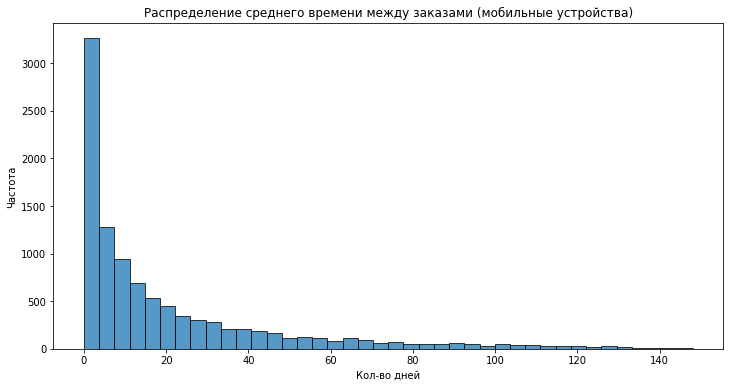

In [36]:
plt.figure(figsize=(12, 6))

mobile_time.plot(
    kind='hist',
    alpha=0.75,
    edgecolor='black',
    bins=40
)
plt.title('Распределение среднего времени между заказами (мобильные устройства)')
plt.xlabel('Кол-во дней')
plt.ylabel('Частота')

plt.show()

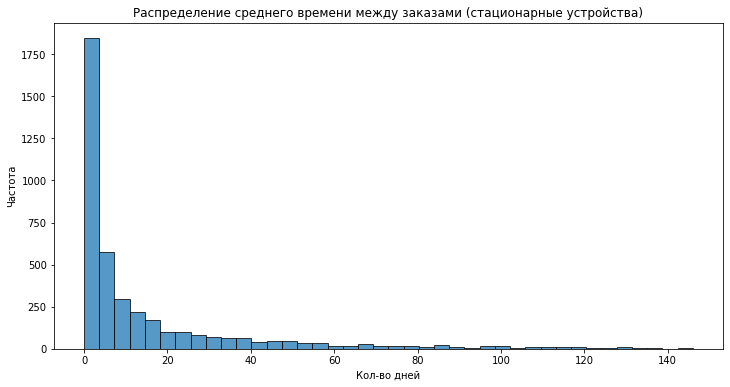

In [37]:
plt.figure(figsize=(12, 6))

desktop_time.plot(
    kind='hist',
    alpha=0.75,
    edgecolor='black',
    bins=40
)
plt.title('Распределение среднего времени между заказами (стационарные устройства)')
plt.xlabel('Кол-во дней')
plt.ylabel('Частота')

plt.show()

Поскольку данные не нормально распределены, то используем U-тест Манна-Уитни

In [38]:
# Проведем U-тест Манна-Уитни  

t_stat, p_value = stats.mannwhitneyu(mobile_time, desktop_time, alternative='greater')
print(f't-статистика = {t_stat:.2f}')

if p_value > alpha:
    print(f'p-value = {p_value:.4f}, значит нет оснований отвергать нулевую гипотезу')
else:
    print(f'p-value = {p_value:.4f}, значит cреднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств')

t-статистика = 24086856.00
p-value = 0.0000, значит cреднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств


Промежуточный вывод:
- Выборки независимы, их размер достаточен для проведения тестов. Сформулировали гапотезы.
- В соответствии первой с гипотезой, что пользователи мобильных устройств совершают больше заказов провели односторонний статистический Т-тест, который подтвердил нашу гипотезу. 
- В соответствии со второй гипотезой, что среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств провели односторонний статистический U-тест Манна-Уитни, который также подтвердил нашу гипотезу. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Методологически проверка гипотез проведена верно и наглядный вывод результатов. Так держать!
</div>

## Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации — на что обратить внимание. В выводах коротко укажите:
- Информацию о данных, с которыми вы работали.
- Основные результаты анализа: какие мероприятия наиболее востребованы, как изменилась популярность мероприятий осенью, как изменилась стоимость среднего чека. Какую информацию можно получить после изучения пользовательской активности? Существуют ли среди регионов и партнёров явные лидеры по числу заказов и выручке с продажи билетов? Дополните вывод другой информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.
- Прокомментируйте результаты проверки гипотез.

В конце предложите рекомендации, на что стоит обратить внимание в первую очередь.

### Выводы
1. На начальном этапе нам были предоставлены 3 таблиицы с информацией обо всех заказах билетов, о событиях и о курсе тенге к российскому рублю за 2024 год. 


2. В начале ислледования провели предобратоку датасетов: избавились от явных и неявных дубликатов, привели тип полей в соответствие с данными в них, а также создали ряд дополнительных полей для дальнейших расчетов. Потеря данных при этом составила порядка 1%. 


3. На стадии исследовательского анализа изучили изменение пользовательской активности или пользовательского интереса в связи с сезонностью. Проанализировали динамику по таким разрезам:
    - тип мероприятия event_type_main
    - тип устройства device_type_canonical
    - категория мероприятий по возрастному рейтингу age_limit
    
В редультате получили:
- График заказов от 6 к 10 месяцу показал уверенный рост (от примерно 3,5 до 10 тыс. заказов)
- Летом и осенью самой популярной категорией были концерты (45% и 35% соответственно). А выставки и елки - самыми непопулярными (менее 5% заказов). 
- Традиционно в каждый сезон доля заказов со смартфонов составляет порядка 80%
- И летом и осень самым популярным возрастным рейтингом стал 16+, а самым непопулярным - 18+
- Наиболее дорогостоящими стали билеты на концерты со средней стоимостью 3,5 и 3 тыс. руб. летом и осенью соответственно. А самые доступные билеты на спортивные мероприятия и выставки. В то же время осенью стоимость билетов на стендапы и спортивные мероприятия возрасла на примерно 280 и 150 руб. соответственно. На елки, концерты и театры снизилась на примерно 470, 450 и 360 руб. соответственно.   


4. Изучили активность пользователей осенью 2024 года. Проанализировали динамику изменений по дням для:
    - общего числа заказов
    - количества активных пользователей DAU
    - среднего числа заказов на одного пользователя
    - средней стоимости одного билета
    
В редультате получили:
- Общее число заказов принимало максимальные значения 1 сентября, 1 октября и 31 октября (5, 7 и 6 тыс. соответственно)
- Среднее число заказов на пользователя принимало максимальные значения 1 сентября, 1 октября и 31 октября (6,5, 6,5 и 5 соответственно)
- При этом минимальные значение средней стоимости билета также выпадали на указанные периоды
- Кол-во активных пользователей, в целом, имело равномерный рост на протяжении всего перида
- В будние дни пользовательская активность выше, чем в выходные (943 и 893 соответственно). Среднее кол-во заказов в будни также выше (3 и 2 соответственно). При этом средняя стоимость билета в бидни тоже ниже (6100 и 6500 руб. соответственно)


5. Посмотрели, как события распределены по регионам и партнёрам. Это позволило выделить ключевые регионы и партнёров, которые вносят наибольший вклад в выручку.

В редультате получили:
- Наиболее насыщенным по кол-ву и типам мероприятий регионом является Каменевский (3946 (25%) мероприятий, 16 типов). На него пришлось порядка 28% всех заказов.
- На 2-м месте Североярская область	(2622 (12%) мероприятий, 13 типов). На нее пришлось порядка 12% всех заказов.


6. По просьбе коллег из продуктового отдела проверили 2 гипотезы, которые предполагали большую активность пользователей мобильных устройств. А именно:
    - Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств
    - Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств
    
В редультате получили: статистическое подтверждение обеих гипотез. 

### Предложения
- С учетом полученных данных об активности пользователей проведение акций в начале осенних месяцев ощутимо поднимало заинтересованность пользователей в покупке билетов на мероприятия. При этом прирост клиентов показывал уверенную динамику на протяжении всего периода. Этот факт демонстрирует, что имеется определенный спрос на посещение различных мероприятий, однако сдерживающим фактором остается стоимость билета. Таким образом плановое проведение регулярных маркетинговых компаний будет способствовать повышению вовлеченности пользователей и росту кол-ва продаж.
- Соответствующие действия необходимо реализовывать с прицелом на пользователей мобильных устройств, доля которых составляет порядка 80%

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

В итоговом выводе отражены результаты исследовательской части, есть интерпретация тестов, а также рекомендации по развитию сервиса - отлично!

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__

Виталий, с моей стороны критических замечений нету. - проект принят! Если возникнут вопросы по ревью, то их можно передать через куратора



Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличный метариал по статистике. 
    
* Курс "Вероятность и статистика" | Глеб Михайлов (free): https://www.youtube.com/playlist?list=PLQJ7ptkRY-xbHLLI66KdscKp_FJt0FsIi
    
* Методы обнаружения выбросов: https://youtu.be/TOK7Kq7x0yc
    

</div>